# RUN WITH PYTHON 3.5 AND PANDAS 0.20.1

# UNSW-NB 15 Dataset Feed Forward ML Model - Attack Type Classification 



UNSW-NB15 is a network traffic data set with different categories for normal activities and synthetic attack behaviours.

This project includes a diffent approach to the classification model for UNSW-NB15 data set then before. This model developed using a random forest and feed-forward neural network. The system uses the random forest that classifies data to normal or malicious data. This information is then used to train a neural network to further classify the attack data to different attack categories. 

Solves:Detailed clarification of what types of attacks your classification is likely to miss and how methods might be improved.


This notebook will the follwing machine learning methods:

- Random Forest : For Attack or Normal Classifier
- Feed Forward Neural Networks: For Attack Type Classifier

We will illustrate this ML model approach and compare the performances.


The raw network packets of the UNSW-NB 15 dataset was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours. Further information found at https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/



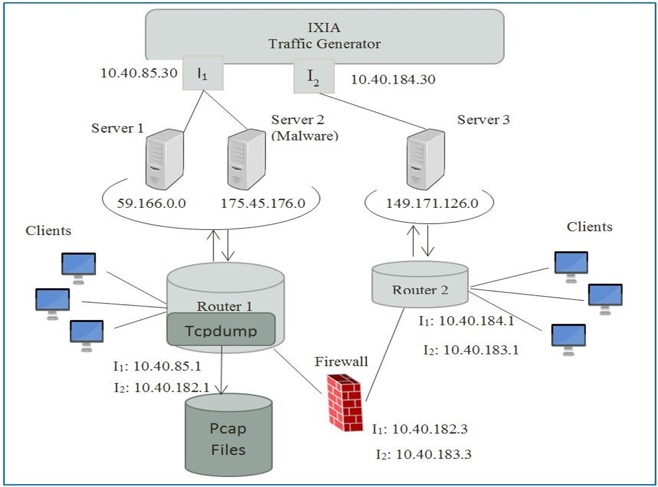









Tcpdump tool is utilised to capture 100 GB of the raw traffic (e.g., Pcap files). This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms. The Argus, Bro-IDS tools are used and twelve algorithms are developed to generate totally 49 features with the class label.

These features are described in UNSW-NB15_features.csv file.

The total number of records is 2,540,044 which are stored in the four CSV files, namely, UNSW-NB15_1.csv, UNSW-NB15_2.csv, UNSW-NB15_3.csv and UNSW-NB15_4.csv.


The details of the UNSW-NB15 dataset are published in following the papers:

Moustafa, Nour, and Jill Slay. "UNSW-NB15: a comprehensive data set for network intrusion detection systems (UNSW-NB15 network data set)." Military Communications and Information Systems Conference (MilCIS), 2015. IEEE, 2015.
Moustafa, Nour, and Jill Slay. "The evaluation of Network Anomaly Detection Systems: Statistical analysis of the UNSW-NB15 dataset and the comparison with the KDD99 dataset." Information Security Journal: A Global Perspective (2016): 1-14.
Moustafa, Nour, et al. . "Novel geometric area analysis technique for anomaly detection using trapezoidal area estimation on large-scale networks." IEEE Transactions on Big Data (2017).
Moustafa, Nour, et al. "Big data analytics for intrusion detection system: statistical decision-making using finite dirichlet mixture models." Data Analytics and Decision Support for Cybersecurity. Springer, Cham, 2017. 127-156.






For more information, please contact the authors: Harshil Patel & Yuesheng Chen are a students in Industrial Engineering at Ohio State University, and they are interested in new Cyber threat intelligence approaches and the technology of Industry 4.0. 

In this notebook, the operations conducted include:

- Preprocessing the data to prepare for training ML models.
- Creating datsets for feed-forward ML model.
- Training ML models based RM and ANN.
- Evaluating ML model based on testing data.

# Data Information

**UNSW-NB15: a comprehensive data set for network intrusion detection systems**

These features are described in UNSW-NB15_features.csv file.

A partition from this dataset is configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv respectively.

The number of records in the training set is 175,341 records and the testing set is 82,332 records from the different types, attack and normal.Figure 1 and 2 show the testbed configuration dataset and the method of the feature creation of the UNSW-NB15, respectively. The addtional features are as described in UNSW-NB15_features.csv file.


### Response Features


attack_class= This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms.

Label=attack or normal behavior

##### Created on Monday April 20th 2020
@author: Harshil Patel

# Libraries

Import libararies to implement the described machine learning methods using a few different `sklearn` algorithms.

In [2]:
!pip install h5py

tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.18.3 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 46.1.3 which is incompatible.
tensorflow 1.10.0 has requirement tensorboard<1.11.0,>=1.10.0, but you'll have tensorboard 2.1.1 which is incompatible.
You are using pip version 10.0.1, however version 20.1b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas
import sklearn

In [4]:
!pip install tensorflow-gpu keras

  Using cached https://files.pythonhosted.org/packages/5a/c7/c5da8ed674d8fa9b7fc072afdcf14a43b66939f00de399e067fc59ebcb89/tensorflow_gpu-2.1.0-cp35-cp35m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/06/9e/57edfd2684d46992850522bf3dad4807fa15b80ade090f64ffa544abbeea/tensorflow_gpu_estimator-2.1.0-py2.py3-none-any.whl
  Found existing installation: wrapt 1.10.11


tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.18.3 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 46.1.3 which is incompatible.
tensorflow 1.10.0 has requirement tensorboard<1.11.0,>=1.10.0, but you'll have tensorboard 2.1.1 which is incompatible.
Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You are using pip version 10.0.1, however version 20.1b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import normalize # , LabelEncoder
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)

# 1.) PRE-PROCESSING & LOADING DATA

### Read the info about features

In [7]:
data_info = pandas.read_csv("UNSW-NB15_features.csv", encoding = "ISO-8859-1", header=None).values
features = data_info[1:-2,:]
feature_names = features[:, 1]  # Names of the features in a list
feature_types = np.array([item.lower() for item in features[:, 2]])  # The types of the corresponding features in 'features_names'

In [8]:
print(feature_names, '\n')
print(feature_types)

['srcip' 'sport' 'dstip' 'dsport' 'proto' 'state' 'dur' 'sbytes' 'dbytes'
 'sttl' 'dttl' 'sloss' 'dloss' 'service' 'Sload' 'Dload' 'Spkts' 'Dpkts'
 'swin' 'dwin' 'stcpb' 'dtcpb' 'smeansz' 'dmeansz' 'trans_depth'
 'res_bdy_len' 'Sjit' 'Djit' 'Stime' 'Ltime' 'Sintpkt' 'Dintpkt' 'tcprtt'
 'synack' 'ackdat' 'is_sm_ips_ports' 'ct_state_ttl' 'ct_flw_http_mthd'
 'is_ftp_login' 'ct_ftp_cmd' 'ct_srv_src' 'ct_srv_dst' 'ct_dst_ltm'
 'ct_src_ ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm' 'ct_dst_src_ltm'] 

['nominal' 'integer' 'nominal' 'integer' 'nominal' 'nominal' 'float'
 'integer' 'integer' 'integer' 'integer' 'integer' 'integer' 'nominal'
 'float' 'float' 'integer' 'integer' 'integer' 'integer' 'integer'
 'integer' 'integer' 'integer' 'integer' 'integer' 'float' 'float'
 'timestamp' 'timestamp' 'float' 'float' 'float' 'float' 'float' 'binary'
 'integer' 'integer' 'binary' 'integer' 'integer' 'integer' 'integer'
 'integer' 'integer' 'integer' 'integer']


### Index arrays for different data types of features 

In [9]:
nominal_cols = np.where(feature_types == "nominal")[0]
integer_cols = np.where(feature_types == "integer")[0]
binary_cols = np.where(feature_types == "binary")[0]
float_cols = np.where(feature_types == "float")[0]

### Arrays for names of the different data types of features

In [10]:
nominal_names = feature_names[nominal_cols]
integer_names = feature_names[integer_cols]
binary_names = feature_names[binary_cols]
float_names = feature_names[float_cols]
print("nominal:",nominal_names,"\n")
print("integer names:",integer_names,"\n")
print("binary names:",binary_names,"\n")
print("float names:",float_names,"\n")


nominal: ['srcip' 'dstip' 'proto' 'state' 'service'] 

integer names: ['sport' 'dsport' 'sbytes' 'dbytes' 'sttl' 'dttl' 'sloss' 'dloss' 'Spkts'
 'Dpkts' 'swin' 'dwin' 'stcpb' 'dtcpb' 'smeansz' 'dmeansz' 'trans_depth'
 'res_bdy_len' 'ct_state_ttl' 'ct_flw_http_mthd' 'ct_ftp_cmd' 'ct_srv_src'
 'ct_srv_dst' 'ct_dst_ltm' 'ct_src_ ltm' 'ct_src_dport_ltm'
 'ct_dst_sport_ltm' 'ct_dst_src_ltm'] 

binary names: ['is_sm_ips_ports' 'is_ftp_login'] 

float names: ['dur' 'Sload' 'Dload' 'Sjit' 'Djit' 'Sintpkt' 'Dintpkt' 'tcprtt' 'synack'
 'ackdat'] 



### Load in Data

In [11]:
df1 = pandas.read_csv("UNSW-NB15_1.csv", header=None)
df2 = pandas.read_csv("UNSW-NB15_2.csv", header=None)
df3 = pandas.read_csv("UNSW-NB15_3.csv", header=None)
df4 = pandas.read_csv("UNSW-NB15_4.csv", header=None)
dataframe = pandas.concat([df1, df2, df3, df4])
del df1
del df2
del df3
del df4

C:\Users\Harshil Patel\anaconda3\envs\p3555\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Harshil Patel\anaconda3\envs\p3555\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
5,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0
6,59.166.0.6,2142,149.171.126.4,53,udp,CON,0.001134,132,164,31,...,0,12,7,1,2,2,1,1,NaN,0
7,10.40.182.3,0,10.40.182.3,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,NaN,0
8,59.166.0.5,40726,149.171.126.6,53,udp,CON,0.001126,146,178,31,...,0,6,7,3,1,1,1,1,NaN,0
9,59.166.0.7,12660,149.171.126.4,53,udp,CON,0.001167,132,164,31,...,0,6,7,2,1,1,1,1,NaN,0


### Preprocessing and Converting data

In [13]:
dataframe[integer_cols] = dataframe[integer_cols].convert_objects(convert_numeric=True)
dataframe[binary_cols] = dataframe[binary_cols].convert_objects(convert_numeric=True)
dataframe[float_cols] = dataframe[float_cols].convert_objects(convert_numeric=True)
dataframe[48] = dataframe[48].convert_objects(convert_numeric=True)
#dataframe[nominal_cols] = dataframe[nominal_cols].astype(str)

C:\Users\Harshil Patel\anaconda3\envs\p3555\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Harshil Patel\anaconda3\envs\p3555\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\Harshil Patel\anaconda3\envs\p3555\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Harshil Patel\anaconda3\envs\p3555\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_ti

In [14]:
#Replacing NaNs
dataframe.loc[:,47] = dataframe.loc[:,47].replace(np.nan,'normal', regex=True).apply(lambda x: x.strip().lower())
dataframe.loc[:,binary_cols] = dataframe.loc[:,binary_cols].replace(np.nan, 0, regex=True)
dataframe.loc[:,37:39] = dataframe.loc[:,37:39].replace(np.nan, 0, regex=True)
# dataframe.loc[:,float_cols] = dataframe.loc[:,float_cols].replace(np.nan, 0, regex=True)

In [15]:
#Stripping nominal columns and setting them lower case
dataframe.loc[:,nominal_cols] = dataframe.loc[:,nominal_cols].applymap(lambda x: x.strip().lower())

In [16]:
#Changing targets \'backdoors\' to \'backdoor\'...
dataframe.loc[:,47] = dataframe.loc[:,47].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

In [17]:
networkData=dataframe.values
del dataframe

In [18]:
# Subsets of the dataset which have data that is only of the corresponding data type (nominal, integer etc)
# Or Columns don't include the target classes (the two last columns of the dataset)
nominal_x = networkData[:, nominal_cols][:,:]
integer_x = networkData[:, integer_cols][:,:].astype(np.float32)    
binary_x = networkData[:, binary_cols][:,:].astype(np.float32)
float_x = networkData[:, float_cols][:,:].astype(np.float32)
# aon_x = dataset[:, 48][np.newaxis,:].astype(np.float32).transpose()  # Attack or not (binary)

In [19]:
#Make nominal (textual) data binary vectors
# D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
D = map(lambda dataline: dict(zip(nominal_names, dataline)), nominal_x)
labeled_nominal_x = v.fit_transform(D).astype(np.float32)
del nominal_x
X = np.concatenate((integer_x, labeled_nominal_x, float_x, binary_x), axis=1)
del integer_x
del labeled_nominal_x
del float_x
del binary_x

### Removing NaNs 

In [20]:
nan_indices = []
for feature_i in range(X.shape[1]):
    nan_indices.extend(list(np.where(np.isnan(X[:, feature_i]))[0]))
nan_indices = np.unique(nan_indices)
# Remove rows that have NaNs
X_no_nans = np.delete(X, nan_indices, axis=0)
del X

In [21]:
normalized_X = normalize(X_no_nans, copy=False)

### Normalizing X

In [22]:
del X_no_nans
data_dim = normalized_X.shape
#Data dimensions are: data_dim)
#Creating target Y matrix
Y = np.delete(networkData[:, -2], nan_indices)
Y_A = np.delete(networkData[:, -1], nan_indices).astype(np.int16) # Is attack or not
del networkData

In [23]:
# Remove same rows as in X to have correct y's
Y_no_nans = np.delete(Y, nan_indices, axis=0)
#Vectorizing Y labels
D = [{'attack_cat': y} for y in Y]
labeled_Y = v.fit_transform(D)
del D

### Saving normalized X and labeled Y to FeedAttack File

In [1]:
!pip install h5py==2.8.0
import h5py

  Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.18.3 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 46.1.3 which is incompatible.
tensorflow 1.10.0 has requirement tensorboard<1.11.0,>=1.10.0, but you'll have tensorboard 2.1.1 which is incompatible.
You are using pip version 10.0.1, however version 20.1b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [24]:
#Saving normalized X and labeled Y to HDF5
feedAttack = h5py.File('data.h5', 'w')
feedAttack.create_dataset('normalized_X', data=normalized_X)
feedAttack.create_dataset('labeled_Y', data=labeled_Y)
dt = h5py.special_dtype(vlen=str)
feedAttack.create_dataset('Y', data=Y, dtype=dt)
feedAttack.create_dataset('Y_A', data=Y_A)
feedAttack.close()
del Y
del normalized_X
del labeled_Y

# 2.) Create Datasets to Feed Fit Neural Net From RandomForest Classification/ with Feature Importance Plots Shown

### Get Data From h5py package

In [25]:
feedAttack = h5py.File('data.h5', 'r')
normalized_X = feedAttack['normalized_X'].value
labeled_Y = feedAttack['labeled_Y'].value
Y = feedAttack['Y'].value
Y_A = feedAttack['Y_A'].value
feedAttack.close()

### Splitting X to test and train datasets

In [26]:
# X_test, X_train, Y_test, Y_train = []
rf_normal_inds = []
nn_normal_inds = []
inds = []

attack_cats = np.unique(Y)
cat_sizes = []
np.random.seed(1337)
max_training_samples = 5000
print('Select max', max_training_samples, 'samples for training...')
for cat in attack_cats:
    indices = np.ix_(Y == cat)[0]
    # total_num_of_samples = indices.shape[0]
    np.random.shuffle(indices)
    if cat == 'normal':
        len_of_subset = min(np.floor(len(indices)*0.9), 31000)
        rf_normal_inds = indices[:len_of_subset]
        nn_normal_inds = indices[:len_of_subset][:max_training_samples]
        cat_size = len(indices)
        print(cat, ': training samples =', len_of_subset, '| total samples =', cat_size)
    else:
        len_of_subset = min(np.floor(len(indices)*0.9), max_training_samples)

        cat_size = len(indices)
        print(cat, ': training samples =', len_of_subset, '| total samples =', cat_size)
        cat_sizes.append(cat_size)
        #inds.extend(oversampled_indices)
        inds.extend(indices[:int(len_of_subset)])

Select max 5000 samples for training...
analysis : training samples = 2409.0 | total samples = 2677
backdoor : training samples = 2096.0 | total samples = 2329
dos : training samples = 5000 | total samples = 16353
exploits : training samples = 5000 | total samples = 44525
fuzzers : training samples = 5000 | total samples = 24246
generic : training samples = 5000 | total samples = 215481
normal : training samples = 31000 | total samples = 2218456
reconnaissance : training samples = 5000 | total samples = 13987
shellcode : training samples = 1359.0 | total samples = 1511
worms : training samples = 156.0 | total samples = 174


In [27]:
print('Number of categories is', len(cat_sizes), '| Total samples in categories:\n|', '\n|'.join([str(i)+': '+str(c) for i, c in enumerate(cat_sizes)]))
print('normal samples for rf:', len(rf_normal_inds))
print('normal samples for nn:', len(nn_normal_inds))

Number of categories is 9 | Total samples in categories:
| 0: 2677
|1: 2329
|2: 16353
|3: 44525
|4: 24246
|5: 215481
|6: 13987
|7: 1511
|8: 174
normal samples for rf: 31000
normal samples for nn: 5000


### Attack or not learning data

In [28]:
rf_inds = []
rf_inds.extend(inds)
rf_inds.extend(rf_normal_inds)
X_rf_train = normalized_X[rf_inds, :]
X_rf_test = np.delete(normalized_X, rf_inds, axis=0)
Y_rf_train = Y_A[rf_inds]
Y_rf_test = np.delete(Y_A, rf_inds, axis=0)

### Category learning data

In [29]:
nn_inds = []
nn_inds.extend(inds)
nn_inds.extend(nn_normal_inds)
X_nn_train = normalized_X[nn_inds, :]
# Remove rf indices because nn indices is a subset and we dont want to test and train with same data
X_nn_test = np.delete(normalized_X, rf_inds, axis=0)

del normalized_X

Y_nn_train = labeled_Y[nn_inds]
Y_nn_train_string = Y[nn_inds]

Y_nn_test = np.delete(labeled_Y, rf_inds, axis=0)
Y_nn_test_string = np.delete(Y, rf_inds, axis=0)

del labeled_Y
del Y

Y_nn_A_train = Y_A[nn_inds]
Y_nn_A_test = np.delete(Y_A, rf_inds, axis=0)

del Y_A

### Finding feature importances with ExtraTreesClassifier

In [30]:
def find_importances(X_train, Y_train):
    model = ExtraTreesClassifier()
    model = model.fit(X_train, Y_train)
    
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]  # Top ranking features' indices
    return importances, indices, std

import matplotlib.pyplot as plt
# Plot the feature importances of the forest
def plot_feature_importances(X_train, importances, indices, std, title):
    plt.figure(figsize=(12,12))
    plt.title(title)
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

    

rf_importances, rf_indices, rf_std = find_importances(X_rf_train, Y_rf_train)

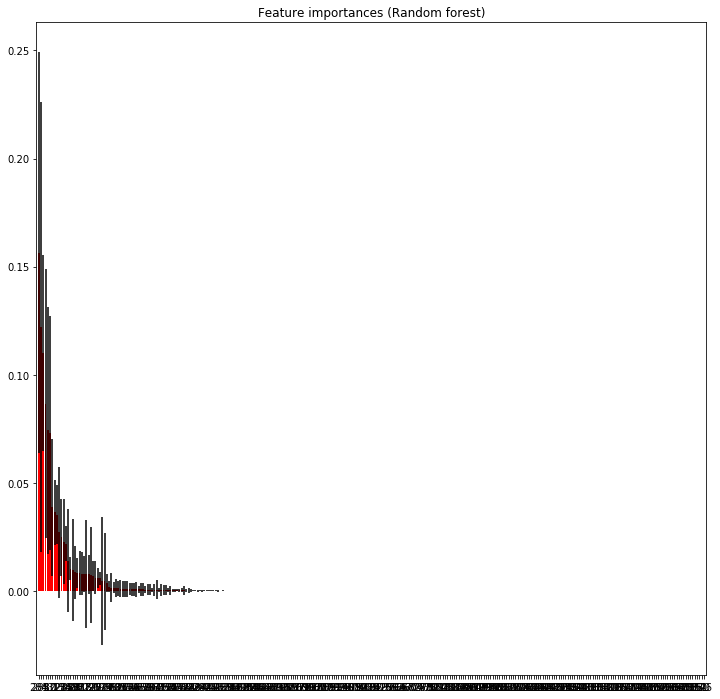

In [31]:
plot_feature_importances(X_rf_train, rf_importances, rf_indices, rf_std, title='Feature importances (Random forest)')

### Neural network is classified with correct 'attack or not' labels

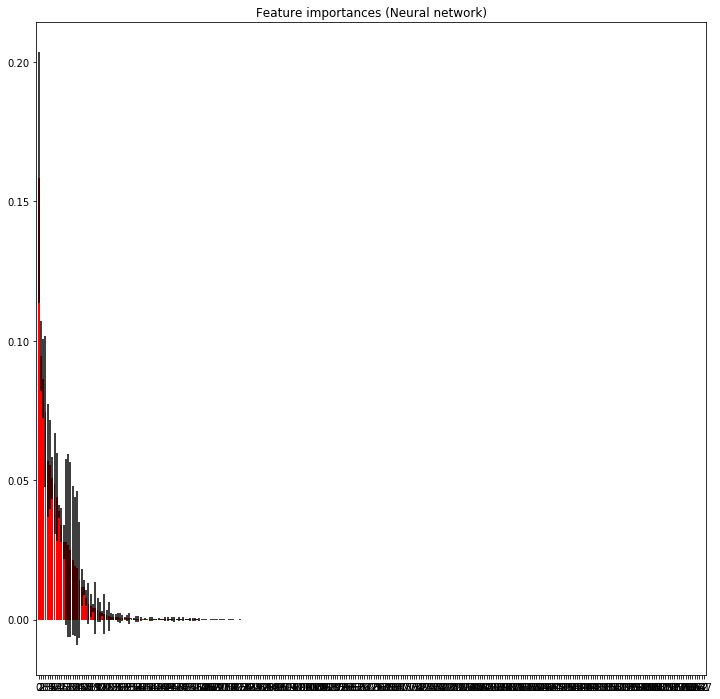

In [32]:
X_nn_train = np.concatenate((Y_nn_A_train[:,np.newaxis], X_nn_train), axis=1)
nn_importances, nn_indices, nn_std = find_importances(X_nn_train,
                                                      Y_nn_train)
plot_feature_importances(X_nn_train,
                        nn_importances, nn_indices, nn_std, title='Feature importances (Neural network)')

In [33]:
NB_RF_FEATURES = 10
NB_NN_FEATURES = 25

In [34]:
reduced_X_nn_train = X_nn_train[:, nn_indices[0:NB_NN_FEATURES]]
reduced_Y_nn_train = Y_nn_train
reduced_Y_nn_train_string = Y_nn_train_string
reduced_Y_nn_test_string = Y_nn_test_string
reduced_Y_nn_A_train = Y_nn_A_train

# Test set has 1 less because we get the one from RF

reduced_X_nn_test = X_nn_test[:, nn_indices[1:NB_NN_FEATURES]]
reduced_Y_nn_test = Y_nn_test


reduced_X_rf_train = X_rf_train[:, rf_indices[0:NB_RF_FEATURES]]
reduced_Y_rf_train = Y_rf_train

reduced_X_rf_test = X_rf_test[:, rf_indices[0:NB_RF_FEATURES]]
reduced_Y_rf_test = Y_rf_test

### Saving X and Y to HDF5

In [35]:
h5f = h5py.File('datasets.h5', 'w')
h5f.create_dataset('X_rf_train', data=reduced_X_rf_train)
h5f.create_dataset('X_rf_test',  data=reduced_X_rf_test)
h5f.create_dataset('Y_rf_train', data=reduced_Y_rf_train)
h5f.create_dataset('Y_rf_test',  data=reduced_Y_rf_test)

h5f.create_dataset('X_nn_train', data=reduced_X_nn_train)
h5f.create_dataset('X_nn_test',  data=reduced_X_nn_test)
h5f.create_dataset('Y_nn_train', data=reduced_Y_nn_train)
h5f.create_dataset('Y_nn_test',  data=reduced_Y_nn_test)
dt = h5py.special_dtype(vlen=str)
h5f.create_dataset('Y_nn_train_string', data=reduced_Y_nn_train_string, dtype=dt)
h5f.create_dataset('Y_nn_test_string', data=reduced_Y_nn_test_string, dtype=dt)

h5f.create_dataset('Y_nn_A_train', data=reduced_Y_nn_A_train)
h5f.create_dataset('Y_nn_A_test', data=Y_nn_A_test)

h5f.close()

# 3.) Fit Neural Net 

In [40]:
!pip install --ignore-installed --upgrade tensorflow-gpu==1.15.0

  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/a5/e6c07b08b934831ccb8c98ee335e66b7761c5754ee3cabfe4c11d0b1af28/opt_einsum-3.2.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/c3/0243b0b4ec343ae4c8b304a2bc0133052b3a3b65dfb42c6e03a4ef032ed8/numpy-1.18.3-cp35-cp35m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/33/bf/b834be50f6ffd57ba5f66c0d92731ea6604cbf7a5b9b06e1fda8defc9c88/grpcio-1.28.1-cp35-cp35m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/

tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.18.3 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 46.1.3 which is incompatible.
tensorflow 1.10.0 has requirement tensorboard<1.11.0,>=1.10.0, but you'll have tensorboard 1.15.0 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Harshil Patel\\anaconda3\\envs\\p3555\\Lib\\site-packages\\numpy\\linalg\\lapack_lite.cp35-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 20.1b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [42]:
#import tensorflow 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, merge, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import np_utils
from tensorflow.keras.regularizers import l2, activity_l2

Using TensorFlow backend.


TypeError: expected bytes, Descriptor found

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import confusion_matrix as cm
import roc

### Loading new data from HDF5

In [ ]:
h5f = h5py.File('datasets.h5', 'r')
X_train = h5f['X_nn_train'].value
Y_train = h5f['Y_nn_train'].value.astype(np.float32)
X_test = h5f['X_nn_test'].value
Y_test = h5f['Y_nn_test'].value.astype(np.float32)

X_train2 = h5f['X_rf_train'].value
Y_train2 = h5f['Y_rf_train'].value.astype(np.float32)
X_test2 = h5f['X_rf_test'].value
Y_test2 = h5f['Y_rf_test'].value.astype(np.float32)
h5f.close()

### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
print('Training ExtraTreesClassifier for "attack or not" labels...')
model2 = ExtraTreesClassifier(n_estimators=31, criterion='entropy')
model2 = model2.fit(X_train2, Y_train2)

Y_pred2 = model2.predict_proba(X_test2)[:,1]

print('Testing accuracy...')
score2 = accuracy_score(Y_test2, np.around(Y_pred2))
print(score2)
print(classification_report(Y_test2, np.around(Y_pred2)))

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==0:
           TN += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

TP, FP, TN, FN = perf_measure(np.around(Y_pred2), Y_test2)

In [ ]:
fp_rate = FP/(TN+FP)
tn_rate = TN/(TN+FP)

accuracy = (TN+TP)/(TN+FP+TP+TN)
precision = TP/(TN+FP)
hitrate = TP/(TN+FN)

print('TP:', TP, 'FP:', FP, 'TN:', TN, 'FN:', FN)
print('Accuracy:', accuracy)
print('False Positive rate:', fp_rate, 'True Negative Rate', tn_rate)

In [ ]:
def to_cat(y):
    y_tmp = np.ndarray(shape=(y.shape[0], 2), dtype=np.float32)
    for i in range(y.shape[0]):
        y_tmp[i, :] = np.array([1-y[i], y[i]])   # np.array([0,1]) if y[i] else np.array([1,0])
    return y_tmp

In [ ]:
cm.plot_confusion_matrix(Y_test2, np.round(Y_pred2), classes=list(range(2)),
                          normalize=True,
                          title='"Attack or not" confusion matrix')
roc.plot_roc_curve(to_cat(Y_test2), to_cat(Y_pred2), 2, 0, title='Receiver operating characteristic (attack_or_not = 0)')
roc.plot_roc_curve(to_cat(Y_test2), to_cat(Y_pred2), 2, 1, title='Receiver operating characteristic (attack_or_not = 1)')


In [ ]:
print('Combining predicted "attack or not" labels to neural network testing data...')
X_test = np.concatenate((Y_pred2[:,np.newaxis], X_test), axis=1)

print('Creating neural network...')
num_of_features = X_train.shape[1]
nb_classes = Y_train.shape[1]

### Model

In [ ]:
def residual_layer(size, x):
    
    y = Dense(size, activation='sigmoid', W_regularizer=l2(0.01), activity_regularizer=activity_l2(0.01))(x)
    # x = Dropout(0.5)(x)
    # print(x.get_shape().as_list()[1])
    y = Dense(x.get_shape().as_list()[1], activation='sigmoid',  W_regularizer=l2(0.01), activity_regularizer=activity_l2(0.01))(y)
    res = merge([y, x], mode='sum')
    return res


def baseline_model():
    def branch2(x):
        
        x = Dense(np.floor(num_of_features*50), activation='sigmoid')(x)
        x = Dropout(0.75)(x)
        
        x = Dense(np.floor(num_of_features*20), activation='sigmoid')(x)
        x = Dropout(0.5)(x)
        
        x = Dense(np.floor(num_of_features), activation='sigmoid')(x)
        x = Dropout(0.1)(x)
        return x
    
    main_input = Input(shape=(num_of_features,), name='main_input')

    x = main_input
    x = branch2(x)
    main_output = Dense(nb_classes, activation='softmax')(x)
    model = Model(input=main_input, output=main_output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'categorical_crossentropy'])
    return model

model = baseline_model()

### Training neural network

In [ ]:
history = model.fit(X_train, Y_train,
                    nb_epoch=100,
                    batch_size=128
                    )

print('Plotting training history data...')
print(history.history.keys())

from  epoch_history_plot import  plot_hist

plot_hist(history, ['loss', 'acc'])

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Testing neural network

In [ ]:
Y_predicted = model.predict(X_test)

max_probs = np.argmax(Y_predicted, axis=1)
Y_pred = np.zeros(Y_predicted.shape)
for row, col in enumerate(max_probs):
    Y_pred[row,col] = 1

score = accuracy_score(Y_test, Y_pred)
print(score)
print(classification_report(Y_test.argmax(axis=-1), Y_pred.argmax(axis=-1)))


cm.plot_confusion_matrix(Y_test.argmax(axis=-1), Y_pred.argmax(axis=-1), classes=list(range(10)),
                          normalize=True,
                          title='Confusion matrix')


### Saving neural network model

In [ ]:
json_string = model.to_json()
with open('neural_model1.json', 'w') as f:
    f.write(json_string)
model.save_weights('neural_model_weights1.h5')

model.save('neural_model1.h5')

roc.plot_roc_curve(Y_test, Y_predicted, nb_classes, 6, title='Receiver operating characteristic (class 6)')
roc.plot_roc_curve(Y_test, Y_predicted, nb_classes, 4, title='Receiver operating characteristic (class 4)')
roc.plot_roc_curve(Y_test, Y_predicted, nb_classes, 2, title='Receiver operating characteristic (class 2)')
roc.plot_roc_curve(Y_test, Y_predicted, nb_classes, 0, title='Receiver operating characteristic (class 0)')


model3 = ExtraTreesClassifier(n_estimators=5, criterion='entropy')
print('Fitting...')
model3 = model2.fit(X_train, Y_train.argmax(axis=-1))
print('Predicting...')
Y_predicted3 = model3.predict(X_test)

print('Testing accuracy...')
score3 = accuracy_score(Y_test.argmax(axis=-1), Y_predicted3)
print(score3)
print(classification_report(Y_test.argmax(axis=-1), Y_predicted3))

cm.plot_confusion_matrix(Y_test.argmax(axis=-1), Y_predicted3, classes=list(range(10)),
                          normalize=True,
                          title='Extratrees Confusion matrix')


print('Saving X and Y to HDF5')

h5f = h5py.File('results.h5', 'w')
h5f.create_dataset('Y_predicted', data=Y_pred)
h5f.create_dataset('Y_expected', data=Y_test)
h5f.close()

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    # np.set_printoptions(precision=2)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{0:.4f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_hist(hist, metrics, num=None):
    if num is not None:
        fig = plt.figure(num)
    else:
        fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for metric in metrics:
        ax1.plot(hist.history[metric], label=metric)
    # plt.plot(history.history['val_acc'])
    # ax.ylabel(metric)
    plt.title('model history')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.legend(loc='upper right');
    plt.show()

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_roc_curve(Y_test, Y_pred, nb_classes, class_index, title='Receiver operating characteristic'):
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(nb_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(Y_test[:, i], Y_pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), Y_pred.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr[class_index], tpr[class_index], color='darkorange',
             lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[class_index])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()